In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
# from scipy.stats import beta as beta_dist  # Importando o beta com outro nome

In [17]:
def pdf(x,N,bw=0):
    x_eval=np.linspace(x.min(),x.max(),N)
    kde=gaussian_kde(x,bw_method=bw)
    return x_eval, kde(x_eval)

In [18]:
# Dados amostrados
loc,scale=2,.4
sample_size=10
samples=np.random.normal(loc,scale,sample_size)
prob_samples = pdf_normal(samples,loc,scale)

In [21]:
# Usando os dados amostrados para estimar a pdf
pdf(samples)

LinAlgError: singular matrix: resolution failed at diagonal 0

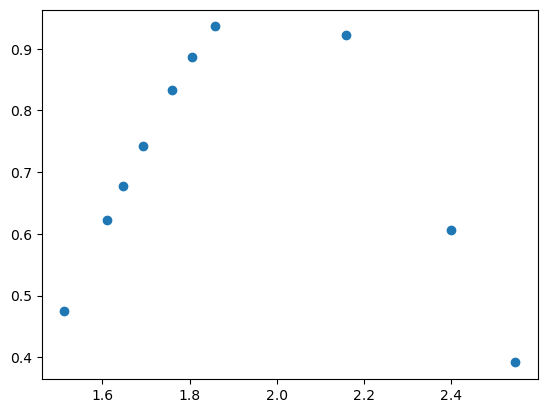

In [11]:
plt.scatter(samples,prob_samples)

In [9]:
def pdf_normal(x,mu=0,sigma=1): 
    return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

In [ ]:
a,b = 3,2
x = np.linspace(0, 1, 1000)
beta_pdf = beta_dist.pdf(x, a, b)

# Amostrar 10 observações aleatórias dos dados gerados
sample = np.random.beta(a, b, 10)

In [ ]:
x_samples = np.random.choice(x,10)
prob_samples = beta_dist.pdf(x_samples, a,b)

In [ ]:
# Plotar a PDF
plt.plot(x, beta_pdf, color='b', lw=1,label='População')
plt.scatter(x=x_samples,y=prob_samples,label='Amostras')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

Nosso objetivo é estimar a curva da população (distribuição beta) a partir das amostras

## Criando uma normal padrão $\mathcal{N}(0,1)$

In [ ]:
def kernel_gaussiano(x,mu=0,sigma=1): 
    return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

Vou começar plotando tudo num mesmo gráfico para dar a intuição do que será realizado

In [ ]:
x=np.linspace(-5,5,1000)
plt.plot(x,kernel_gaussiano(x),lw=.5,ls='--',c='k')
h=2
plt.axvline(x=0,c='k')
estimativa = 0
samples = [1,2,3,4]
colormap = plt.cm.Blues(np.linspace(.2,.8,len(samples)))
for i,s in enumerate(samples):
    plt.plot(x,kernel_gaussiano((x-s)/h),label=f's={s}',color=colormap[i],lw=1)
    plt.scatter(0,kernel_gaussiano((0-s)/h),marker='x',s=50,color=colormap[i])
    # plt.scatter(0,kernel_gaussiano((0-s)/h),marker='x',edgecolor=colormap[i],color='None')
    estimativa+=kernel_gaussiano((0-s)/h)

plt.scatter(0,estimativa/(4*h))
plt.grid(alpha=0.2)

In [ ]:
h=2

samples = [1,2,3,4]
x=np.linspace(-5,5,10)
colormap = plt.cm.Blues(np.linspace(.2,.8,len(samples)))

f=plt.figure(figsize=(20,4))
plt.plot(x,kernel_gaussiano(x),lw=.5,ls='--',c='k')
for va in x:
    plt.axvline(x=va,c='k')
    estimativa = 0
    for i,s in enumerate(samples):
        plt.plot(x,kernel_gaussiano((x-s)/h),label=f's={s}',color=colormap[i],lw=1)
        plt.scatter(0,kernel_gaussiano((va-s)/h),marker='x',s=50,color=colormap[i])
        estimativa+=kernel_gaussiano((va-s)/h)
    plt.scatter(va,estimativa/(4*h))

plt.grid(alpha=0.2)

In [ ]:
x_kernel = np.linspace(-4, 4, 1000)
h=2
kernel_sum = 0
for s in np.sort(sample):
    kernel_sum += kernel_gaussiano((x_kernel-s)/h)
plt.plot(x_kernel, kernel_gaussiano(x_kernel),lw=1,label='K(x)')
plt.plot(x_kernel, kernel_sum/(10*h), lw=1, label=r'$\hat{f}(x)$')
plt.scatter(x=x_samples,y=prob_samples,label='Amostras')

plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [ ]:
x_kernel = np.linspace(-4, 4, 1000)
plt.plot(x, beta_dist.pdf(x, a, b), color='b', lw=1, alpha=0.3, ls='--',label='População')
plt.plot(x_kernel, kernel_gaussiano(x_kernel), color='r', lw=1,label='Kernel')
plt.scatter(x=x_samples,y=prob_samples,label='Amostras')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

Vamos começar construindo a intuição do que vem a ser $K(\frac{x-x_i}{h})$

In [ ]:
f,ax=plt.subplots(figsize=(15,3))
h = 1
for i,s in enumerate(np.sort(x_samples)[:5]):
    u = (x_kernel-s)/h
    ax.plot(x_kernel, kernel_gaussiano(u), color='r', lw=1,label='Kernel')
ax.grid(alpha=0.3)
plt.show()

1. **Kernel de Gaussiana**: O kernel é uma função que descreve como cada ponto de dados contribui para a estimativa de densidade. O **kernel Gaussiano** é uma função de forma suave, com pico na origem e caindo rapidamente para zero em torno do centro. Ele é usado para atribuir "peso" aos pontos de dados próximos, de modo que os pontos mais distantes tenham um peso menor.

   O kernel Gaussiano é dado por:
   $$
   K(u) = \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{1}{2}u^2\right)
   $$
   Onde $u$ é a diferença entre o ponto de dados e o ponto no qual estamos calculando a densidade.

Vou gerar 10 pontos de uma distribuição normal

In [ ]:
# Definindo o kernel Gaussiano
def gaussian_kernel(u):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u ** 2)

In [ ]:
# Função para estimar a densidade usando o KDE
def kde_estimation(data, x_vals, bandwidth):
    n = len(data)  # Número de pontos de dados
    density = np.zeros_like(x_vals)  # Vetor para armazenar a densidade estimada
    
    # Somando os kernels para cada ponto de dados
    for x in x_vals:
        # Calculando a soma dos kernels
        kernels_sum = 0
        for xi in data:
            kernels_sum += gaussian_kernel((x - xi) / bandwidth)  # Aplicando a largura de banda
        density[x_vals == x] = kernels_sum / (n * bandwidth)  # Normalizando pela largura de banda e número de pontos
    
    return density

In [ ]:
# Gerando dados amostrais a partir de uma distribuição normal
data = np.random.normal(0, 1, size=1000)

# Definindo os pontos em que vamos calcular a densidade
x_vals = np.linspace(-5, 5, 1000)

# Largura de banda (h)
bandwidth = 0.3

# Estimando a densidade
density = kde_estimation(data, x_vals, bandwidth)

# Plotando a estimativa de densidade
plt.plot(x_vals, density, label="Estimativa de Densidade")
plt.hist(data, bins=30, density=True, alpha=0.5, label="Histograma")
plt.legend()
plt.title("Estimativa de Densidade usando KDE")
plt.show()

2. **Soma de Kernels**: Para estimar a densidade em um ponto $x$, o `gaussian_kde` soma os kernels de todos os pontos de dados. Ou seja, ele gera uma curva suavizada que aproxima a verdadeira distribuição de probabilidade subjacente aos dados.

   A estimativa da densidade $ \hat{f}(x) $ em um ponto $x$ é dada por:
   $$
   \hat{f}(x) = \frac{1}{N h} \sum_{i=1}^{N} K\left(\frac{x - x_i}{h}\right)
   $$
   Onde:
   - $N$ é o número de dados,
   - $h$ é o parâmetro de **largura de banda** (bandwidth),
   - $x_i$ são os pontos de dados amostrais,
   - $K$ é o kernel Gaussiano.

3. **Largura de Banda ($h$)**: O parâmetro $h$ controla o **tamanho do kernel**. Ele é fundamental para determinar a suavização da estimativa de densidade:
   - Se $h$ for muito pequeno, a estimativa será **irregular** (overfitting), com picos e vales pronunciados.
   - Se $h$ for muito grande, a estimativa será **excessivamente suave**, perdendo detalhes da distribuição real.
   O valor de $h$ pode ser escolhido automaticamente pelo algoritmo ou ajustado manualmente.

4. **Propriedade de Suavização**: O `gaussian_kde` tem a capacidade de gerar **curvas suaves** e **contínuas**, mesmo quando os dados são discretos. Ele fornece uma estimativa que não depende de binning (como ocorre em histogramas), o que significa que a densidade é estimada para todos os pontos possíveis dentro do domínio dos dados.

### Passos do `gaussian_kde`:

1. **Escolha da largura de banda**: O primeiro passo é definir a largura de banda, que determina o "tamanho" do kernel. Uma boa escolha de largura de banda é crucial para obter uma estimativa suave e precisa da densidade.
   
2. **Construção da estimativa**: A função `gaussian_kde` constrói a função de densidade somando as contribuições de todos os kernels Gaussianos para todos os pontos de dados.

3. **Avaliação da densidade**: Depois de ajustado, o `gaussian_kde` pode ser usado para estimar a densidade em qualquer ponto do domínio de interesse.